# Customer Shopping Trends Analysis

## Introduction

This analysis explores customer shopping behavior using a dataset of 3,336 records containing information about purchases including customer demographics, item details, purchase amounts, and shopping preferences. The dataset includes features such as age, gender, item categories, prices, locations, sizes, seasons, and payment methods.

## Data Exploration
### Importing the dataset

In [2]:
import pandas as pd

def load_shopping_data(data_path: str):
    return pd.read_csv(data_path)

In [3]:
DATA_PATH = '../data/shopping_trends.csv'
shopping_data = load_shopping_data(DATA_PATH)
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Preliminary Exploration

In [4]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Inside our dataset we have 19 rows, mostly of which are identified as `object`, which in our case are `strings`.
#### Category Exploration
For each categorical column we are gonna explore which values are available and how many rows have a certain categorical value. We start with the gender of the purchaser:

In [10]:
gender_counts = shopping_data['Gender'].value_counts()
gender_counts

Male      2652
Female    1248
Name: Gender, dtype: int64

The number of purchases made by male customers almost doubles the number of purchases made by female customers. We can see this better using a pie chart:

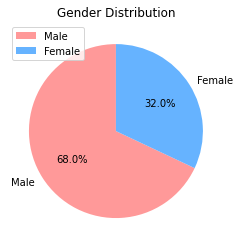

In [11]:
import matplotlib.pyplot as plt

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], legend=True)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

Next we are gonna explore the items purchased, using a histogram:

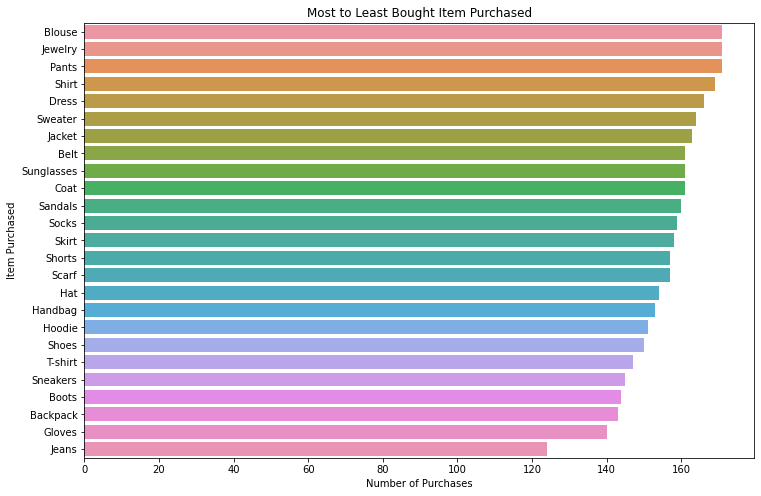

In [20]:
import seaborn as sns

def plot_item_distribution(column_name: str):
    item_count = shopping_data[column_name].value_counts()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=item_count.values, y=item_count.index, order=item_count.index)
    plt.xlabel('Number of Purchases')
    plt.ylabel(column_name)
    plt.title(f'Most to Least Bought {column_name}')
    plt.show()

plot_item_distribution('Item Purchased')

The most purchased items are Blouses, Pants and Jewelry.

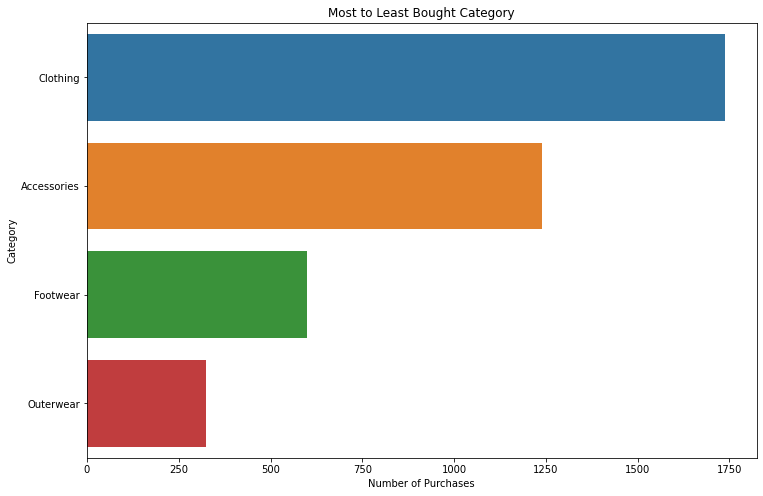

In [21]:
plot_item_distribution('Category')

This category has only 4 possible values and most of the items purchased are clothes.

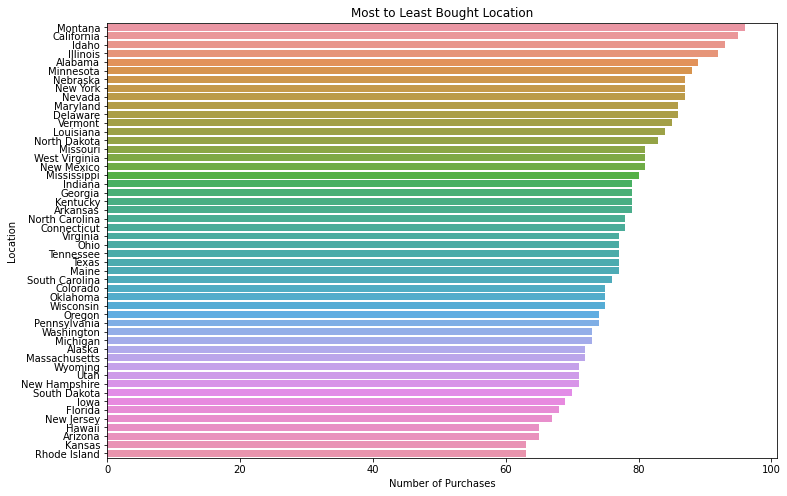

In [24]:
plot_item_distribution('Location')

Plotting the `Location` of the purchases shows us that all of them are made in the US. The clients are spread all over the state but the states with the highest number of purchases are `Montana`, `California` and `Idaho`.